In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from adjustText import adjust_text
import matplotlib.patheffects as pe
import pandas as pd
import os
os.chdir(r'E:\AAA_Labwork\capenterlab_mtb')

In [3]:
txid = pd.read_csv('tx2gene_grch38_ens94.txt',sep = '\t',index_col = 1)
id_table = pd.DataFrame(txid['symbol']).drop_duplicates().T
id_dict = id_table.to_dict(orient = 'records')[0]#index = False)
# ylimmax = [80,60,100,100,130]

In [43]:
more_res = pd.read_csv("test_182866/gene_perturb_10000_1_selectedgene_more.csv",index_col= 6, header = 0).iloc[1:,:]
less_res = pd.read_csv("test_182866/gene_perturb_10000_1_selectedgene_less.csv",index_col= 6,header=0).iloc[1:,:]

more_res = more_res.rename(index = id_dict)
less_res = less_res.rename(index = id_dict)

In [44]:
merged_df = more_res.merge(less_res, how = 'outer', on = 'Affected_Ensembl_ID', suffixes = ['_more','_less'])
merged_df

,Unnamed: 0_more,Perturbed_more,Gene_name_more,Ensembl_ID_more,Affected_more,Affected_gene_name_more,Cosine_sim_mean_more,Cosine_sim_stdev_more,N_Detections_more,Unnamed: 0_less,Perturbed_less,Gene_name_less,Ensembl_ID_less,Affected_less,Affected_gene_name_less,Cosine_sim_mean_less,Cosine_sim_stdev_less,N_Detections_less
Affected_Ensembl_ID,,,,,,,,,,,,,,,,,,
CYS1,13268.0,14743.0,LCK,ENSG00000182866,17396,CYS1,0.854677,0.000000,1.0,12218.0,14743.0,LCK,ENSG00000182866,17396,CYS1,0.978993,0.000000,1.0
C17orf78,13433.0,14743.0,LCK,ENSG00000182866,19606,C17ORF78,0.878958,0.076192,2.0,12631.0,14743.0,LCK,ENSG00000182866,19606,C17ORF78,0.955159,0.025309,3.0
ZNF418,12946.0,14743.0,LCK,ENSG00000182866,16306,ZFP418,0.899881,0.087182,2.0,10428.0,14743.0,LCK,ENSG00000182866,16306,ZFP418,0.986465,0.008572,18.0
CBY3,12487.0,14743.0,LCK,ENSG00000182866,17216,CBY3,0.911189,0.036891,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRTP1,13449.0,14743.0,LCK,ENSG00000182866,7775,TBC1D6,0.911273,0.099959,3.0,11626.0,14743.0,LCK,ENSG00000182866,7775,TBC1D6,0.970742,0.030128,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPP1R2B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13284.0,14743.0,LCK,ENSG00000182866,18077,PPP1R2B,0.998746,0.000000,1.0
S100B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13372.0,14743.0,LCK,ENSG00000182866,10310,S100-B,0.998747,0.000000,1.0
CLDN11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12299.0,14743.0,LCK,ENSG00000182866,331,CLDN11,0.998775,0.000000,1.0


In [48]:
merged_df = merged_df[(merged_df['N_Detections_more']>100)|(merged_df['N_Detections_less']>100)]

In [49]:
merged_df.columns

Index(['Unnamed: 0_more', 'Perturbed_more', 'Gene_name_more',
       'Ensembl_ID_more', 'Affected_more', 'Affected_gene_name_more',
       'Cosine_sim_mean_more', 'Cosine_sim_stdev_more', 'N_Detections_more',
       'Unnamed: 0_less', 'Perturbed_less', 'Gene_name_less',
       'Ensembl_ID_less', 'Affected_less', 'Affected_gene_name_less',
       'Cosine_sim_mean_less', 'Cosine_sim_stdev_less', 'N_Detections_less'],
      dtype='object')

In [51]:
merged_df = merged_df[['Cosine_sim_mean_more', 'Cosine_sim_stdev_more', 'N_Detections_more','Cosine_sim_mean_less', 'Cosine_sim_stdev_less', 'N_Detections_less']]

In [52]:
merged_df = merged_df.fillna(1)

In [54]:
merged_df.to_csv('test_182866/merged_result.csv')

In [56]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests
import numpy as np
from sklearn.preprocessing import StandardScaler

merged_df['difference_more-less'] = merged_df['Cosine_sim_mean_more'] - merged_df['Cosine_sim_mean_less']
merged_df['difference_more-less'].sort_values(ascending=False)
# scaler = StandardScaler()
# standardized_more = scaler.fit_transform(merged_df['Cosine_sim_mean_more'])
# standardized_more
# stat, p_val = wilcoxon(merged_df['col1'], merged_df['col2'])
# print("Wilcoxon test statistic:", stat)
# print("Original p-value:", p_val)

Affected_Ensembl_ID
ING2        0.023277
APLF        0.021426
FNDC9       0.021425
ARID3B      0.014622
UBTD2       0.012402
              ...   
CD109      -0.014084
SLC35F3    -0.014089
AFG1L      -0.015488
PIK3AP1    -0.017289
HSP90AB1   -0.017918
Name: difference_more-less, Length: 9978, dtype: float64

In [124]:
legend_locs = ['upper right','lower right','lower right','upper right']

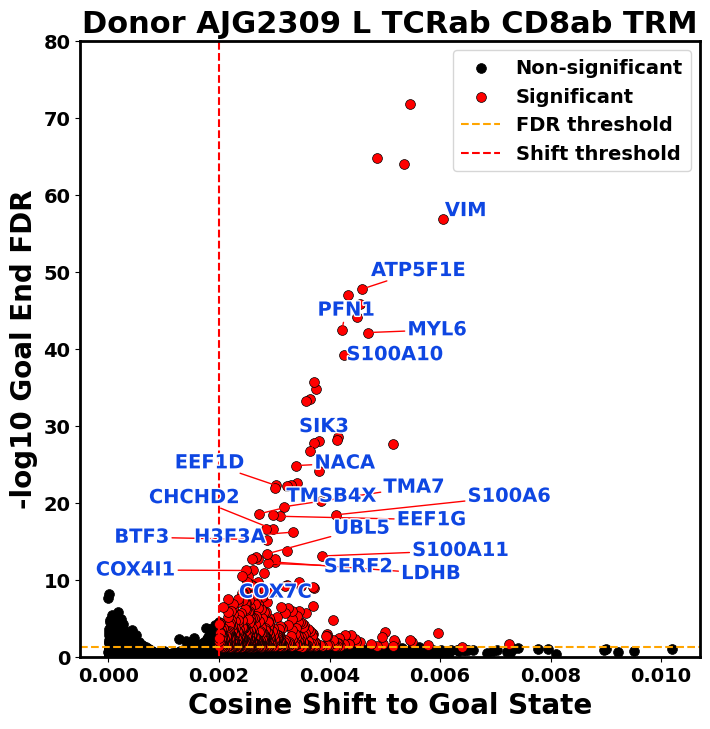

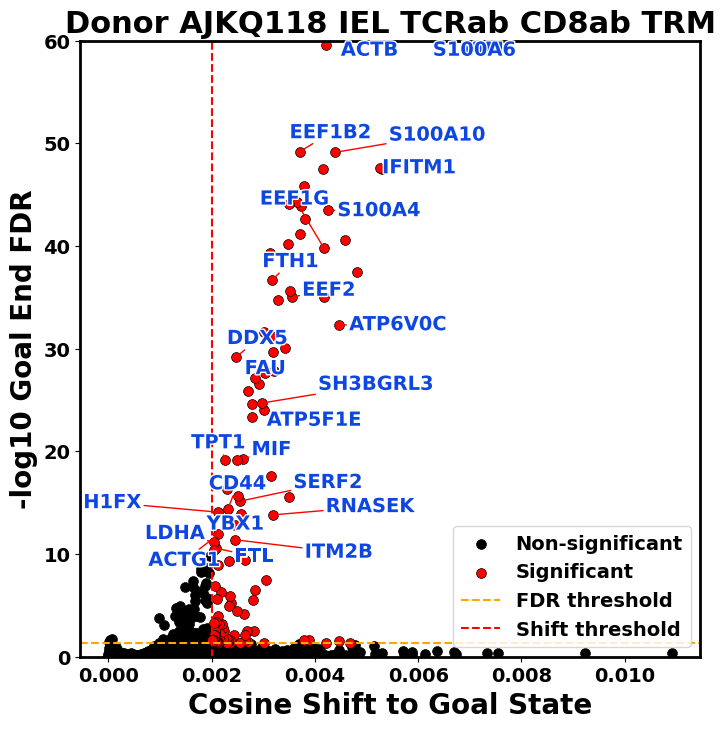

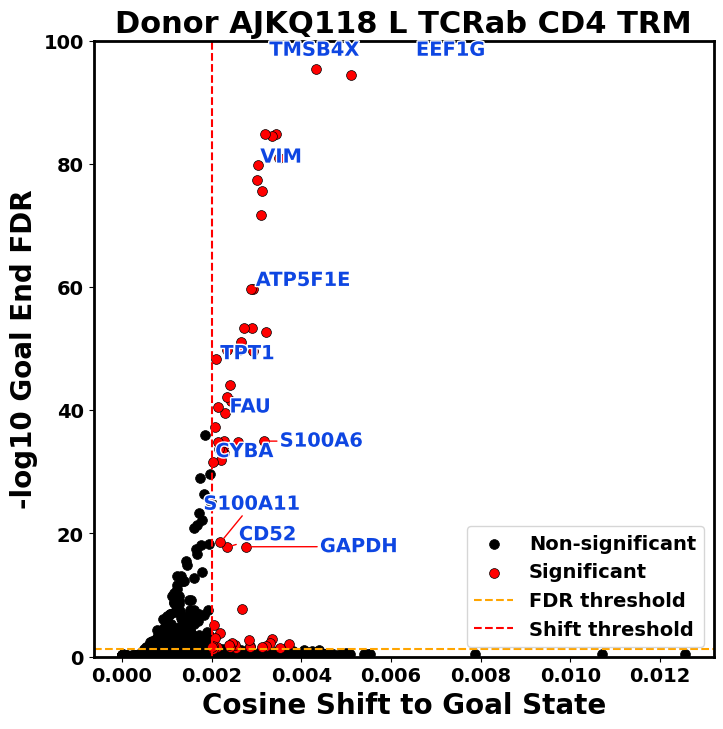

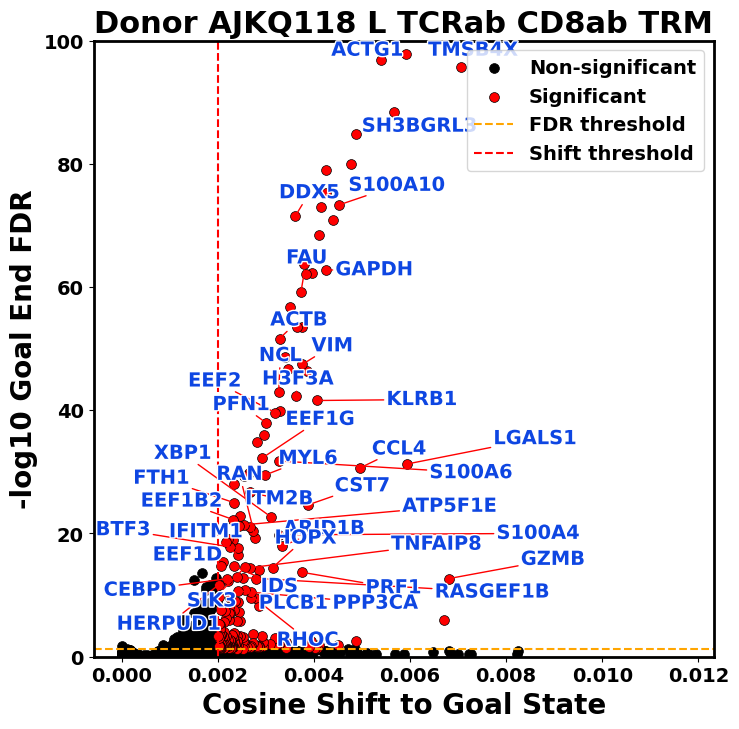

In [125]:
for j, dir_name in enumerate(dir_names):
    df = pd.read_csv(f"E:/AAA_Labwork/T cells/v3/Geneformer/{dir_name}/T_expand.csv",index_col= 3)
    #df = pd.read_csv(f"E:/AAA_Labwork/T cells/v3/Geneformer/{dir_names[1]}/T_expand.csv",index_col= 3)
    df = df.drop(columns = 'Unnamed: 0')
    
    data = df.rename(index = id_dict)
    data = data[data['Shift_to_goal_end'] > 0 ]

    # Calculate -log10(FDR)
    data['-log10_FDR'] = -np.log10(data['Goal_end_FDR'])

    # Separate significant and non-significant entries
    sig_data = data[(data['Sig'] == 1) & (data['Shift_to_goal_end'] >= 0.002)]
    non_sig_data = data[(data['Sig'] == 0) | (data['Shift_to_goal_end'] < 0.002)]

    important_list = sig_data.index[((sig_data['-log10_FDR'] > 10) | (sig_data['Shift_to_goal_end'] > 0.01)) & ~sig_data.index.str.startswith('RP') & ~sig_data.index.str.startswith('MT')& ~sig_data.index.str.startswith('ENSG')]

    # Plot settings
    plt.figure(figsize=(8, 8))
    plt.rcParams.update({'font.size': 14, 'font.weight': 'bold', 'axes.linewidth': 2})

    # Scatter plot for significant and non-significant points
    plt.scatter(non_sig_data['Shift_to_goal_end'], non_sig_data['-log10_FDR'], 
                color='black', s=50, edgecolors='black', linewidths=0.5, label='Non-significant')

    plt.scatter(sig_data['Shift_to_goal_end'], sig_data['-log10_FDR'], 
                color='red', s=50, edgecolors='black', linewidths=0.5, label='Significant')
    texts = []
    for i, row in sig_data.iterrows():
        if i in important_list:
            texts.append(plt.text(row['Shift_to_goal_end'], row['-log10_FDR'], 
                                  i, size = 14, color= '#0E46E2', weight = 'bold', #bbox=dict(boxstyle="Square,pad=0.1", fc="white", ec="b", lw=2, alpha = 0.8),
                                   path_effects=[pe.withStroke(linewidth=2, foreground="white")]))

    plt.ylim([-0.01,ylimmax[j]])
    plt.axhline(y=-np.log10(0.05), color="orange", linestyle="--", label='FDR threshold')
    plt.axvline(x=0.002, color="red", linestyle="--", label='Shift threshold')
    plt.legend(loc = legend_locs[j])

    # Adjust text to avoid overlap
    adjust_text(texts, force_static  = 0.3, force_text = 0.4, max_move  = 100, arrowprops=dict(arrowstyle='-', color='red')) #force_static  = 0.4,

    #plt.xlim([-4.5,4.5])
    # Axes labels and title
    plt.xlabel("Cosine Shift to Goal State", fontsize=20, fontweight='bold')
    plt.ylabel("-log10 Goal End FDR", fontsize=20, fontweight='bold')
    plt.title(dir_name.replace('_',' '), fontsize=22 , fontweight='bold')

    plt.savefig(dir_name+'expand.png')
    #plt.show()